In [27]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
import pandas as pd
import seaborn as sns
sns.set(style='darkgrid')


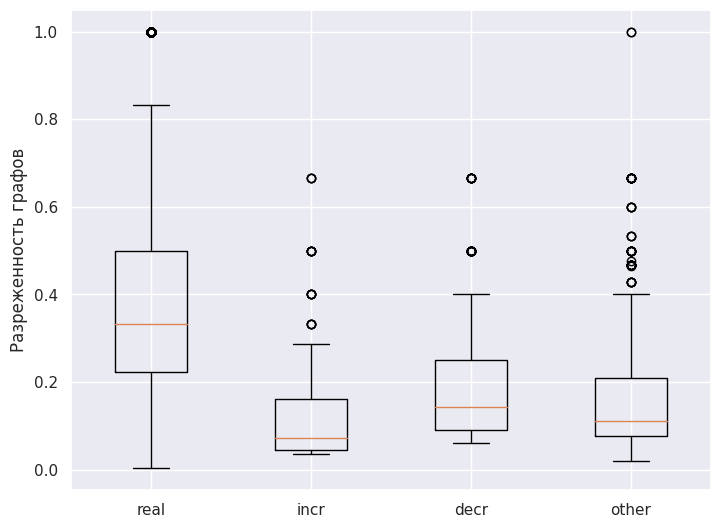

In [28]:
# graph sparity
data = []

for path in map(lambda x : x + "_sparity", ["st/pures", "st/incr", "st/decr", "st/other"]):
    with open(path , 'r') as f:
        array = np.array(f.readline().split(' ')[:-1], dtype=np.float64)
        data.append(array)

fig = plt.figure()
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
# Creating plot
bp = ax.boxplot(data)
ax.set_ylabel("Разреженность графов")
ax.set_xticklabels(["real", "incr", "decr", "other"])
# plt.show()
fig.savefig('sparity.jpg')


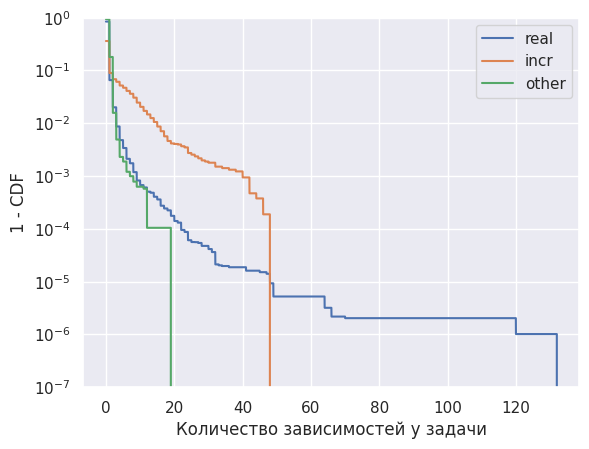

In [48]:
# out degree
data = []
for path in map(lambda x : x + "_out_deg", ["st/pures", "st/incr", "st/decr", "st/other"]):
    with open(path , 'r') as f:
        array = np.array(f.readline().split(' ')[:-1], dtype=np.float64)
        data.append(array)

fig = plt.figure()

for i in range(4):
    if i == 2:
        continue
    data_l = np.array(sorted( data[i]))
    count, bins_count = np.histogram(data_l, bins=50000)
    
    pdf = count / sum(count)
    
    cdf = 1 - np.cumsum(pdf)
    plt.plot(bins_count[1:], cdf,label=["real", "incr", "decr", "other"][i])
plt.ylim((10**-7,1.00001)) # todo
plt.yscale('log')
plt.legend()
plt.ylabel("1 - CDF")
plt.xlabel("Количество зависимостей у задачи")

# plt.show()
fig.savefig('out_degree.jpg')

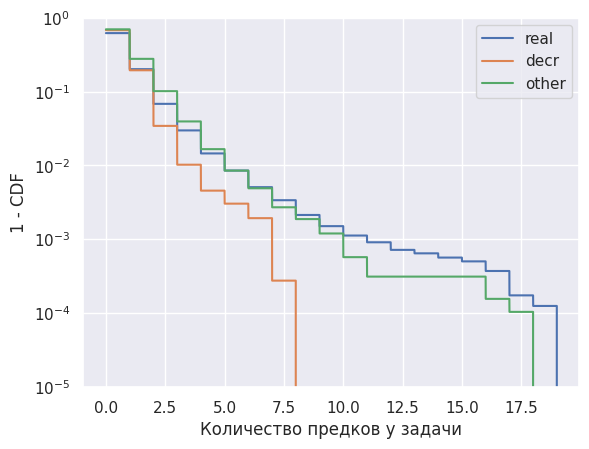

In [47]:
# in degree
data = []

for path in map(lambda x : x + "_in_deg", ["st/pures", "st/incr", "st/decr", "st/other"]):
    with open(path , 'r') as f:
        array = np.array(f.readline().split(' ')[:-1], dtype=np.float64)
        data.append(array)

fig = plt.figure()


# plt.ylim(0, 1)
for i in range(4):
    if i == 1:
        continue
    data_l = np.array(sorted( data[i]))
    count, bins_count = np.histogram(data_l, bins=50000)
    
    pdf = count / sum(count)
    
    cdf = 1- np.cumsum(pdf)
    plt.plot(bins_count[1:], cdf,label=["real", "incr", "decr", "other"][i])
plt.ylim((10**-5,1.00001))
plt.yscale('log')
plt.legend()
plt.ylabel("1 - CDF")
plt.xlabel("Количество предков у задачи")
# plt.show()
fig.savefig('in_degree.jpg')

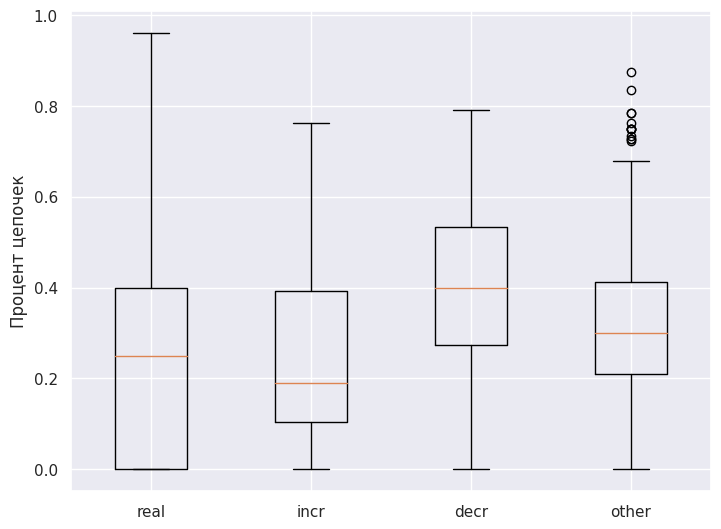

In [43]:
data = []

for path in map(lambda x : x + "_chain_ration", ["st/pures", "st/incr", "st/decr", "st/other"]):
    with open(path , 'r') as f:
        array = np.array(f.readline().split(' ')[:-1], dtype=np.float64)
        data.append(array)

fig = plt.figure()
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])

# Creating plot
bp = ax.boxplot(data)
ax.set_xticklabels(["real", "incr", "decr", "other"])
# plt.show()
ax.set_ylabel("Процент цепочек")
fig.savefig('chain_ratio.jpg')
# graph chain ratio
# mean is close enough but i generate more chain graphs (even if then add instances cross edeges)

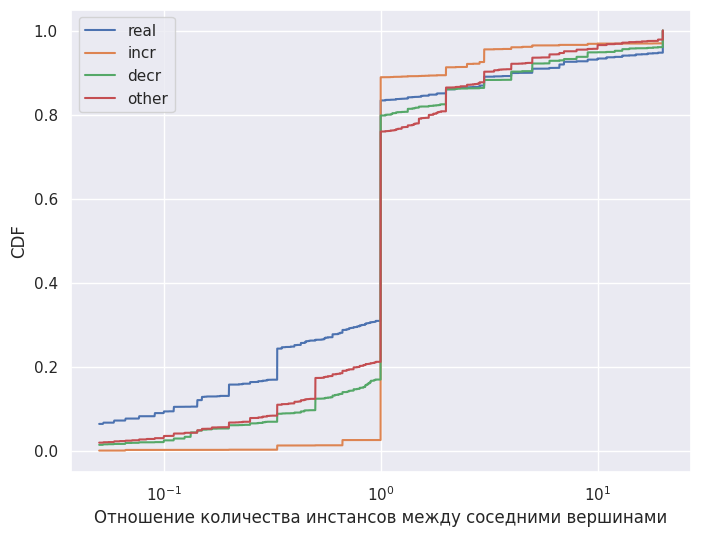

In [40]:
# pairwise ins raion
data = []

for path in map(lambda x : x + "_ins_ratio", ["st/pures", "st/incr", "st/decr", "st/other"]):
    with open(path , 'r') as f:
        array = np.array(f.readline().split(' ')[:-1], dtype=np.float64)
        data.append(array)

fig = plt.figure(figsize =(8, 6))

for i in range(4):
    
    data_l = np.array(sorted( data[i]))
    count, bins_count = np.histogram(data_l, bins=50000)
    
    pdf = count / sum(count)
    
    cdf =  np.cumsum(pdf)
    plt.plot(bins_count[1:], cdf,label=["real", "incr", "decr", "other"][i])
# plt.ylim((10**-15,1.00001))
plt.xscale('log')
plt.legend()
plt.ylabel("CDF")
plt.xlabel("Отношение количества инстансов между соседними вершинами")
fig.savefig('ins_ratio.jpg')

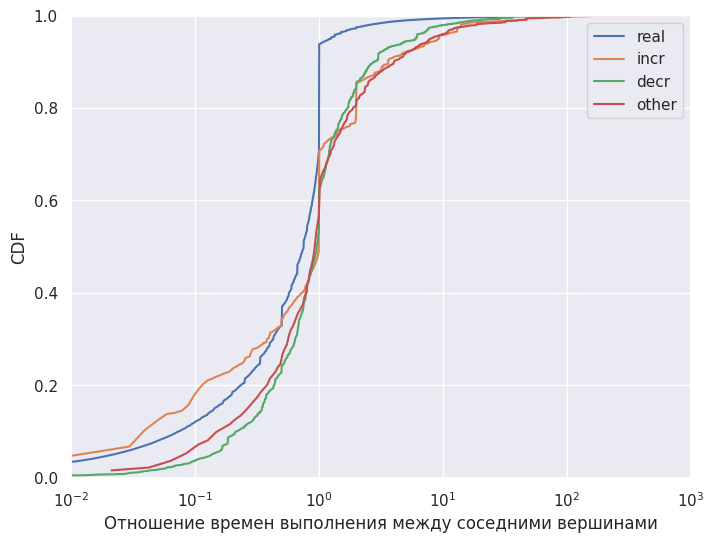

In [41]:
# pairwise flops raion
data = []

for path in map(lambda x : x + "_time_ratio", ["st/pures", "st/incr", "st/decr", "st/other"]):
    with open(path , 'r') as f:
        array = np.array(f.readline().split(' ')[:-1], dtype=np.float64)
        data.append(array)

fig = plt.figure(figsize =(8, 6))

for i in range(4):
    # if i != 0:
    #     continue
    
    
    data_l = np.array(sorted( data[i]))
    # print(data_l[][3417025:3477025])
    count, bins_count = np.histogram(data_l, bins=5000000 if i == 0 else 50000)
    
    pdf = count / sum(count)
    
    cdf =  np.cumsum(pdf)
    plt.plot(bins_count[1:], cdf,label=["real", "incr", "decr", "other"][i])
# plt.ylim((10**-15,1.00001))
plt.xscale('log')
# plt.yscale('log')
plt.ylim((0, 1))
plt.xlim((10**-2, 10**3))
plt.ylabel("CDF")
plt.xlabel("Отношение времен выполнения между соседними вершинами")

plt.legend()
# plt.show()
fig.savefig('time_ratio.jpg')

In [6]:
import pandas as pd

mask_degred = pd.read_csv("/home/ksenia/dslab/tools/dag-test/alibaba_meta/tree_incr/graphic.csv")

mask_degred.head()

,heft,dls,lookahead,peft
0,1.105700,1.105700,1.105700,1.105700
1,0.928998,0.928998,0.928998,0.991826
2,0.729522,0.729522,0.729522,0.878958
3,0.710769,0.710769,0.691419,0.765714
4,0.754807,0.754807,0.754807,0.754807


<Axes: >

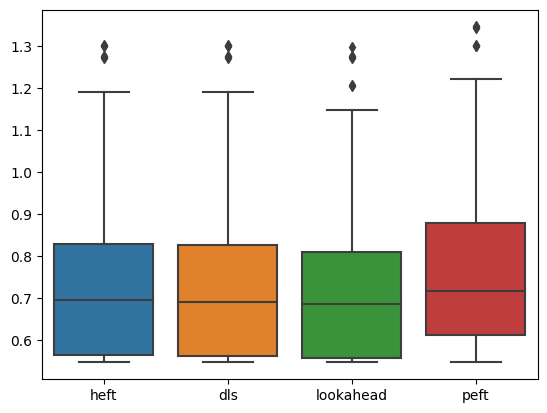

In [4]:
# other
sns.boxplot(mask_degred)

In [9]:
for schd in ['heft', 'dls', 'lookahead', 'peft']:
    mask_degred[schd]  *= 32
    mask_degred[schd]  /= 17.5

In [10]:
mask_degred.describe()

,heft,dls,lookahead,peft
count,1101.000000,1101.000000,1101.000000,1101.000000
mean,1.311125,1.309103,1.292746,1.387137
std,0.323196,0.324447,0.320547,0.320603
min,1.000481,1.000693,1.000344,1.000491
25%,1.031375,1.029298,1.018909,1.121002
50%,1.272788,1.264625,1.255373,1.310503
75%,1.514027,1.509689,1.481474,1.607237
max,2.380143,2.380143,2.373926,2.461450


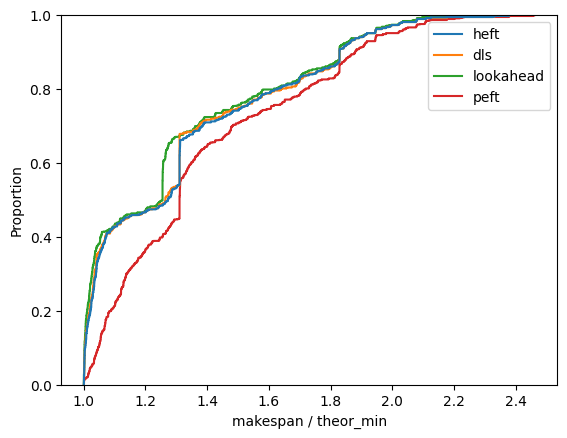

In [18]:
mask_degred = pd.read_csv("/home/ksenia/dslab/tools/dag-test/alibaba_meta/tree_incr/graphic.csv")
for schd in ['heft', 'dls', 'lookahead', 'peft']:
    mask_degred[schd]  *= 32
    mask_degred[schd]  /= 17.5
f = plt.figure()
g = sns.ecdfplot(mask_degred, )
plt.xlabel("makespan / theor_min")
# g.set(xlim=(1, 2))
f.savefig("tree_incr.jpg")


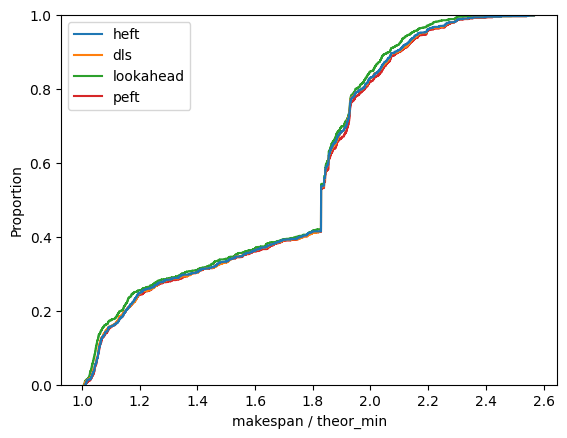

In [17]:
mask_degred = pd.read_csv("/home/ksenia/dslab/tools/dag-test/alibaba_meta/tree_decr/graphic.csv")
for schd in ['heft', 'dls', 'lookahead', 'peft']:
    mask_degred[schd]  *= 32
    mask_degred[schd]  /= 17.5
f = plt.figure()
g = sns.ecdfplot(mask_degred, )
plt.xlabel("makespan / theor_min")
# g.set(xlim=(1, 2))
f.savefig("tree_decr.jpg")

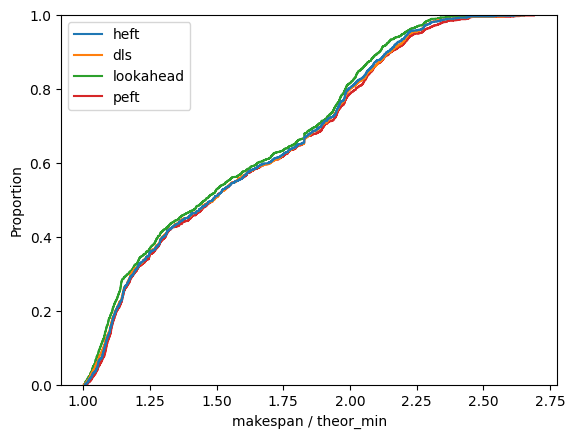

In [16]:
mask_degred = pd.read_csv("/home/ksenia/dslab/tools/dag-test/alibaba_meta/other/graphic.csv")
for schd in ['heft', 'dls', 'lookahead', 'peft']:
    mask_degred[schd]  *= 32
    mask_degred[schd]  /= 17.5
f = plt.figure()
g = sns.ecdfplot(mask_degred, )
plt.xlabel("makespan / theor_min")
# g.set(xlim=(1, 2))
f.savefig("other.jpg")

<Axes: >

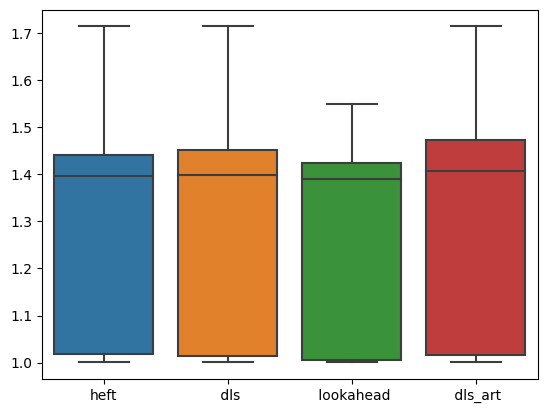

In [92]:
# incr
mask_degred = pd.read_csv("graphic.csv")
sns.boxplot(mask_degred)

[(1.0, 2.0)]

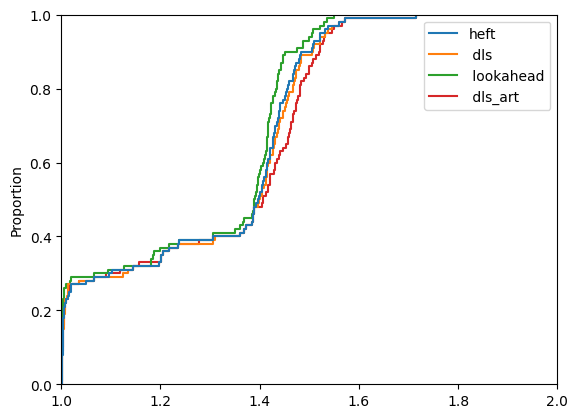

In [93]:
g = sns.ecdfplot(mask_degred, )
g.set(xlim=(1, 2))


<Axes: >

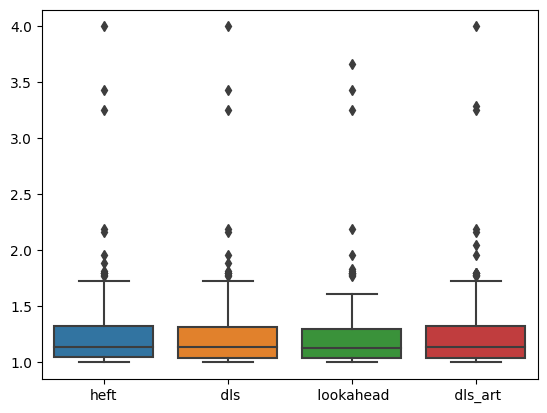

In [6]:
# decr
mask_degred = pd.read_csv("graphic.csv")
sns.boxplot(mask_degred)

[(1.0, 2.0)]

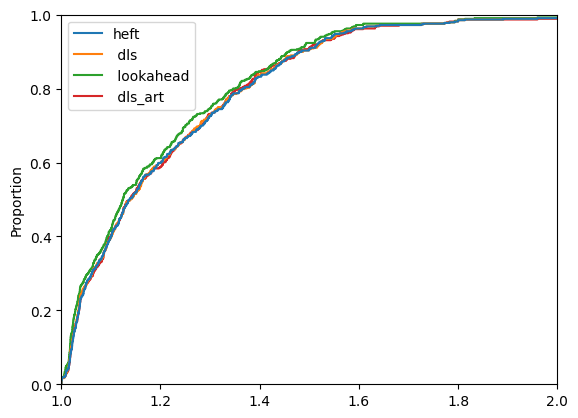

In [8]:
g = sns.ecdfplot(mask_degred, )
g.set(xlim=(1, 2))


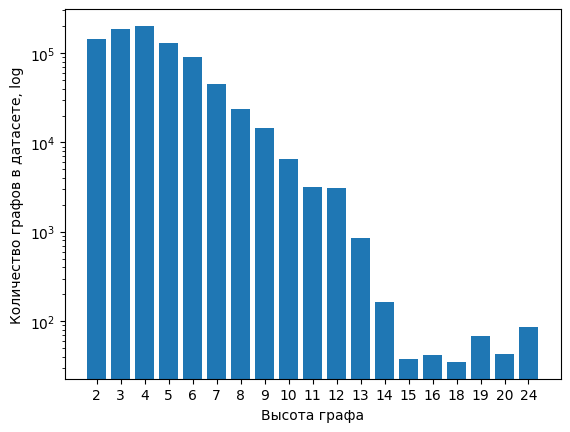

In [27]:
import json
import matplotlib.pyplot as plt
data = json.loads('{"26": 7, "15": 38, "13": 854, "32": 7, "29": 4, "2": 143344, "10": 6569, "23": 1, "16": 42, "7": 45328, "19": 68, "12": 3097, "20": 43, "4": 201272, "24": 86, "22": 21, "34": 6, "54": 3, "6": 90238, "5": 130204, "18": 35, "11": 3133, "21": 21, "3": 187727, "8": 23738, "17": 16, "9": 14488, "14": 165}')

data = dict(filter(lambda x: x[1] > 24, data.items()))

data = sorted(data.items(), key=lambda x: int(x[0]))
data, fl = zip(*data)
fig = plt.figure()
plt.bar(data, fl)
plt.yscale("log")
plt.ylabel("Количество графов в датасете, log")
plt.xlabel("Высота графа")
fig.savefig('cp_cnt.jpg')